In [1]:
#Movies Recommendation based on Content and Popularity

In [2]:
import pandas as pd

In [3]:
#Reading the movies dataset
movies = pd.read_csv("C:/Users/rimarcel/Documents/Movies_Recommendation/Data/movies.csv")
movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [4]:
#Reading the credits dataset
credits = pd.read_csv("C:/Users/rimarcel/Documents/Movies_Recommendation/Data/credits.csv")
credits.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [5]:
df = pd.merge(movies,credits,on="title")
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The

In [6]:
from typing import List
import ast

def convert_json_to_array(json_string: str):
    names = []

    array = ast.literal_eval(json_string)
    for item in array:
        names.append(item['name'] or None)

    return names

def convert_array_to_string(array: List):
    return ' '.join(array).lower()

def update_cast(key: str, value:  int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip().lower())
        return result
    return inner_function

def combine_all_features(features: List[str]):
    def inner_function(series: pd.core.series.Series):
        result = ''
        for feature in features:
            result += (' '.join(series[feature]) + ' ')
        return result
    return inner_function

df['genres']= df['genres'].apply(convert_json_to_array)
df['keywords']=df['keywords'].apply(convert_json_to_array)
df['cast']=df['cast'].apply(update_cast('order',5))
df['crew']=df['crew'].apply(update_crew('job',['Screenplay','Producer','Editor','Writer','Director']))

df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dual identity, amnesia, sandstorm, love of on...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,"[tobey maguire, kirsten dunst, james franco, t...","[sam raimi, sam raimi, bob murawski, laura zis..."
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse, fairy tale, musical, p...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,"[zachary levi, mandy moore, donna murphy, ron ...","[dan fogelman, roy conli, tim mertens, byron h..."
7,280000000,"[Action, Adventure, Science Fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero, based on

In [7]:
#Excluding irrelavant columns

df.drop(['homepage','original_language', 'overview', 'id', 'spoken_languages', 'status', 'tagline', 'movie_id', 'production_companies','production_countries'], axis=1,inplace=True)
df.dropna(inplace=True)
df.head(10)

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."
5,258000000,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm, love of on...",Spider-Man 3,115.699814,2007-05-01,890871626,139.0,Spider-Man 3,5.9,3576,"[tobey maguire, kirsten dunst, james franco, t...","[sam raimi, sam raimi, bob murawski, laura zis..."
6,260000000,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...",Tangled,48.681969,2010-11-24,591794936,100.0,Tangled,7.4,3330,"[zachary levi, mandy moore, donna murphy, ron ...","[dan fogelman, roy conli, tim mertens, byron h..."
7,280000000,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",Avengers: Age of Ultron,134.279229,2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,6767,"[robert downey jr., chris hemsworth, mark ruff...","[kevin feige, joss whedon, joss whedon, jeffre..."
8,250000000,"[Adventure, Fantasy, Family]","[witch, magic, broom, school of witchcraft, wi...",Harry Potter and the Half-Blood Prince,98.885637,2009-07-07,933959197,153.0,Harry Potter and the Half-Blood Prince,7.4,5293,"[daniel radcliffe, rupert grint, emma watson, ...","[steve kloves, david heyman, david yates, mark..."
9,250000000,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero, based on com...",Batman v Superman: Dawn of Justice,155.790452,2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004,"[ben affleck, henry cavill, gal gadot, amy ada...","[charles roven, david s. goyer, david brenner,..."


In [8]:
!pip install wordcloud

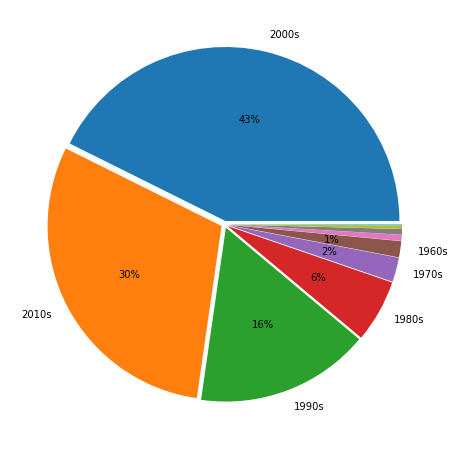

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
def count_pie(series):
    counts = series.value_counts()
    counts = counts/counts.sum()
    labels = ['' if num < 0.01 else str(year)
              for (year, num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] <
               100 else 0.001 for i in range(counts.size)]
    plt.pie(counts, labels=labels, autopct=lambda x: '{:1.0f}%'.format(
        x) if x > 1 else '', explode=explode)
    # plt.show()
    return counts

df['release_date'].dropna(inplace=True)
decade=[]
decade = df['release_date'].apply(lambda x: str(int(x[:4]) // 10 * 10) + 's')
res=count_pie(decade)
result = round(res,3)


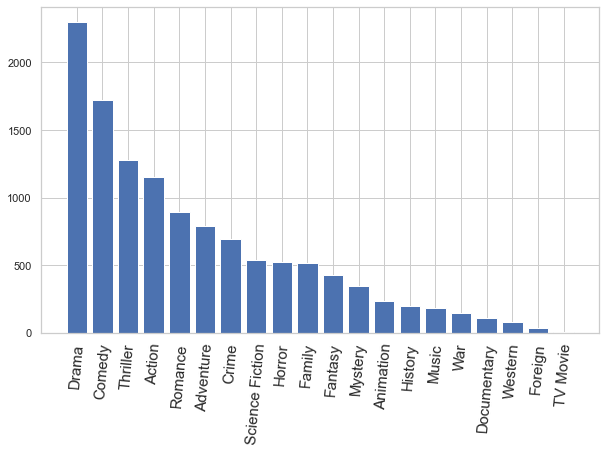

In [10]:
series = df.genres
sns.set(style="whitegrid")

total_genres = []
for genres_list in series:
    total_genres.extend(genres_list)
unique_genres = list(set(total_genres))

values1 = []
for genre in unique_genres:
    count = total_genres.count(genre)
    values1.append((genre, count))
    
values1.sort(key=lambda x: x[1], reverse=True)

dictionary = {}
for item in values1[:30]:
    dictionary[item[0]] = item[1]

plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

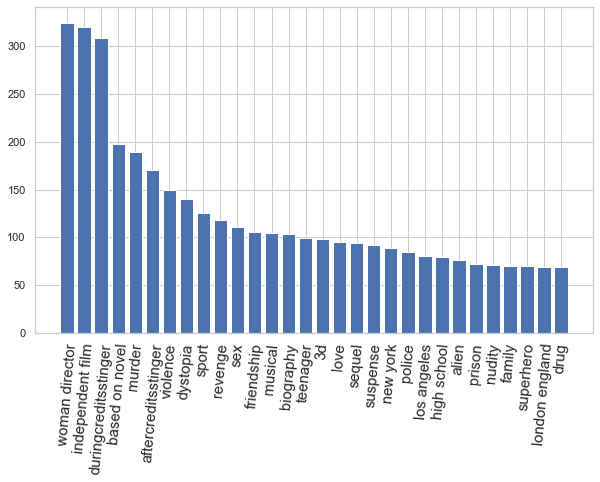

In [11]:
series = df.keywords
sns.set(style="whitegrid")
total_keywords=[]
for keyword in series:
    total_keywords.extend(keyword)
unique_keywords = list(set(total_keywords))
values2=[]
for keyword in unique_keywords:
    count = total_keywords.count(keyword)
    values2.append((keyword, count))
    
values2.sort(key=lambda x: x[1], reverse=True)

dictionary = {}
for item in values2[:30]:
    dictionary[item[0]] = item[1]

plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

In [12]:
!pip install --upgrade Pillow --user

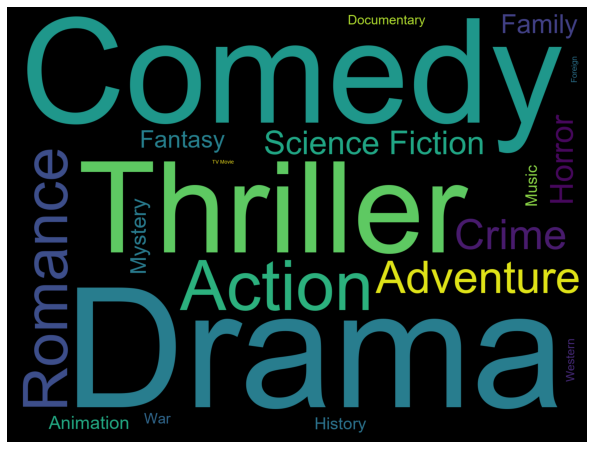

In [13]:
series = df.genres
# font_path = "C:\Windows\Fonts\Arial.ttf"
# print(font_path)

import matplotlib.font_manager as fm
font_path = fm.findfont(fm.FontProperties(family='Arial'))

word_cloud = wc.WordCloud(background_color="black", margin=20, width=800,
                          height=600, prefer_horizontal=0.7, max_words=50, scale=2,font_path=font_path)
total_genres= []
for genres_list in series:
    total_genres.extend(genres_list)
unique_genres = list(set(total_genres))

values3 = []

for genre in unique_genres:
    count = total_genres.count(genre)
    values3.append((genre, count))

values3.sort(key=lambda x: x[1], reverse=True)

dictionary = {}
for item in values3:
    dictionary[item[0]] = item[1]
# print(dictionary)
word_cloud.generate_from_frequencies(dictionary)
word_cloud.to_file('fig4.png')

# plt.rcParams['font.family'] = 'true-type'  # Use a sans-serif font (e.g., Arial, Helvetica)
# plt.rcParams['font.true-type'] = ['Arial']

plt.subplots(figsize=(16, 8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

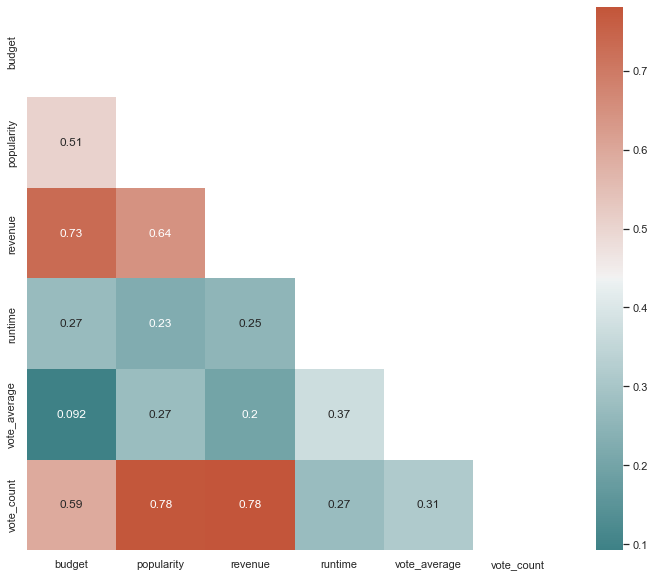

In [14]:
numeric_columns=df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
# Calculate the correlation matrix
cor = numeric_columns.corr()
plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
plt.show()

In [15]:
df['feature'] = df.apply(combine_all_features(['genres', 'keywords', 'cast', 'crew']), axis=1)
df.head(10)

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,feature
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer...",Action Adventure Fantasy Science Fiction cultu...
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot...",Adventure Fantasy Action ocean drug abuse exot...
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br...",Action Adventure Crime spy based on novel secr...
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher...",Action Crime Drama Thriller dc comics crime fi...
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,...",Action Adventure Science Fiction based on nove...
5,258000000,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm, love of on...",Spider-Man 3,115.699814,2007-05-01,890871626,139.0,Spider-Man 3,5.9,3576,"[tobey maguire, kirsten dunst, james franco, t...","[sam raimi, sam raimi, bob murawski, laura zis...",Fantasy Action Adventure dual identity amnesia...
6,260000000,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...",Tangled,48.681969,2010-11-24,591794936,100.0,Tangled,7.4,3330,"[zachary levi, mandy moore, donna murphy, ron ...","[dan fogelman, roy conli, tim mertens, byron h...",Animation Family hostage magic horse fairy tal...
7,280000000,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",Avengers: Age of Ultron,134.279229,2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,6767,"[robert downey jr., chris hemsworth, mark ruff...","[kevin feige, joss whedon, joss whedon, jeffre...",Action Adventure Science Fiction marvel comic ...
8,250000000,"[Adventure, Fantasy, Family]","[witch, magic, broom, school of witchcraft, wi...",Harry Potter and the Half-Blood Prince,98.885637,2009-07-07,933959197,153.0,Harry Potter and the Half-Blood Prince,7.4,5293,"[daniel radcliffe, rupert grint, emma watson, ...","[steve kloves, david heyman, david yates, mark...",Adventure Fantasy Family witch magic broom sch...
9,250000000,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero, based on com...",Batman v Superman: Dawn of Justice,155.790452,2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004,"[ben affleck, henry cavill, gal gadot, amy ada...","[charles roven, david s. goyer, david brenner,...",Action Adventure Fantasy dc comics vigilante s...


In [16]:
indices = pd.Series(df.index, index=df['title'])
indices = indices.drop_duplicates()

In [17]:
#Exploring movie recommendations with TF-IDF
title = 'Avatar'
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['feature'])
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)
movie_index = indices[title]
similarity_scores = list(enumerate(cosine_sim_tfidf[movie_index]))
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
similarity_scores = similarity_scores[1:11]
movie_indices = [score[0] for score in similarity_scores]

recommend1 = df.iloc[movie_indices]['title']

print(recommend1)

2409                        Aliens
25                         Titanic
838                         Alien³
575                    Vanilla Sky
279     Terminator 2: Judgment Day
278             Planet of the Apes
902                  Jerry Maguire
2204                       Lockout
1351                         Aloha
3163                         Alien
Name: title, dtype: object


In [18]:
#Exploring movie recommendations with count vectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['feature'])

cosine_sim_count = cosine_similarity(count_matrix, count_matrix)
movie_index = indices[title]
similarity_scores = list(enumerate(cosine_sim_count[movie_index]))
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
similarity_scores = similarity_scores[1:11]
movie_indices = [score[0] for score in similarity_scores]

# ---WRITE YOUR CODE FOR TASK 4 ---
recommend2 = df.iloc[movie_indices]['title']

#--- Inspect data ---
print(recommend2)

2409                        Aliens
25                         Titanic
279     Terminator 2: Judgment Day
2204                       Lockout
282                      True Lies
1005                       The One
3444                The Terminator
94         Guardians of the Galaxy
587                      The Abyss
902                  Jerry Maguire
Name: title, dtype: object
